<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3 -  Web APIs & NLP

# Contents (Part 1) 

- Executive Summary
- Problem Statement
- Background and Research
- Data Fetching
- Data Filtering (Apple)
- Data Filtering (Samsung)

# Contents (Part 2) - This notebook

- [Data Exploration](#Data-Exploration)
- [Additional Data Filtering](#Additional-Data-Filtering)
- [Data Dictionary](#Data-Dictionary)
- [Natural Language Processing (Apple)](#Natural-Language-Processing-(Apple))
- [Natural Language Processing (Samsung)](#Natural-Language-Processing-(Samsung))

# Contents (Part 3) 

- Preprocessing
- Dummy Classifier
- Multinomial Naive-Bayes
- Logistic Regression
- Support Vector Classifier
- Random Forest
- Results and Analysis
- Conclusion and Recommendations

# Data Exploration

## Importing necessary libraries

The libraries below will be used in this notebook.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Overrides Matplotlib theme with Seaborn's 
sns.set(font_scale = 1.2)
sns.set_context('talk')

# Enables Pandas to display all the columns
pd.set_option('display.max_columns', None)

# Enables Pandas to display all the rows
pd.set_option('display.max_rows', None)

# Enables Pandas to display more text in a column
pd.set_option('display.max_colwidth', 100)

## Loading the data

In [2]:
ap = pd.read_csv('../data/ap.csv')
ss = pd.read_csv('../data/ss.csv')

In [3]:
ap.head(5)

,author,created_utc,selftext,subreddit,title
0,Gingerstrands,1635283070,"I went to the Apple Store today to look at the pros in person. To be honest, I’m even more uncer...",apple,"To anyone like me who was wondering: yes, you can fit two apps side by side on the 14” comfortab..."
1,BiovelaBoomer,1635282964,"What is the correct way to use the battery pack, would it be plugging in the cable into the ipho...",apple,Correct way to use battery pack?
2,gambler__,1635278050,"As the title says, I am curious why Siri can't recognize the proper pronunciation of hard to pro...",apple,Will Siri ever be able to recognize the proper pronunciation of hard-to-pronounce names?
3,SnooJokes102,1635269119,I bought some airpods pro about a year bought the full cover for it including accidents however...,apple,Question: is it better to ship airpods to apple or take them to the apple store?
4,DentistSea2573,1635257400,"I’m a student and I want to get an iPad for note taking, and maybe for drawing also. But I don’t...",apple,Should I get the 2021 12.9” iPad Pro or wait till next year?


In [4]:
ss.head(5)

,author,created_utc,selftext,subreddit,title
0,llThat1Guyll,1635291756,I think it mightve Changed with the latest update. I swear it looks like longer or something. It...,samsung,"Did the Devil emojii change for Android? At least Samsung, because I swear it Does, but I can't ..."
1,Gold_Enigma,1635289011,I bought a pair of galaxy buds+ a little under a year ago in the US and thought they worked very...,samsung,Samsung is really pissing me off today?
2,noobmistermuffin,1635287113,I work in a phone repair store I don't speak for the brand or any company I speak with what I've...,samsung,DONT UPDATE YOUR A21 PHONE
3,Jorycle,1635285986,Rant mode. So we bought some appliances like 6 months back. It took them so long to come in sto...,samsung,"Samsung delivery policies: Stupid, or the stupidest?"
4,ryang4415,1635284195,I can probably upgrade to a better Samsung up to $1000 for free. What should I get? It's been a ...,samsung,What phone should I upgrade to?


Currently, we have 7208 posts for Apple and 7091 posts for Samsung:

In [5]:
ap.shape

(7208, 5)

In [6]:
ss.shape

(7091, 5)

## Creating new columns

For both Apple and Samsung, we will create some new columns.

### Number of words in `title` 

We will create a column for the number of words in the title.

In [7]:
# Splits the text at each word in the title, and finds the number of words in the resulting list.
ap['title_num_words'] = ap['title'].map(lambda text: len(text.split()))
ss['title_num_words'] = ss['title'].map(lambda text: len(text.split()))

### Number of words in `selftext`

We will create a column for the number of words in the selftext.

In [8]:
# Typecasting done first to prevent errors.
# Splits the text at each word in the selftext, and finds the number of words in the resulting list.

ap['selftext'] = ap['selftext'].astype(str)
ap['selftext_num_words'] = ap['selftext'].map(lambda text: len(text.split()))

ss['selftext'] = ss['selftext'].astype(str)
ss['selftext_num_words'] = ss['selftext'].map(lambda text: len(text.split()))

### Combining `title` with `selftext`

We will create a new column called `text` where the title is combined with the selftext.

In [9]:
# A space is added in between to make sure we don't fuse any words together.
ap['text'] = ap['title'] + ' ' + ap['selftext']
ss['text'] = ss['title'] + ' ' + ss['selftext']

### Number of words in the `text` column

We will create a new column for the number of words in the `text` column, which is the `title` and `selftext` combined.

In [10]:
# Splits the text at each word in the text, and finds the number of words in the resulting list.
ap['text_num_words'] = ap['text'].map(lambda text: len(text.split()))
ss['text_num_words'] = ss['text'].map(lambda text: len(text.split()))

## Number of words in the `title`

First, some summary statistics for Apple:

In [11]:
ap['title_num_words'].describe()

count    7208.000000
mean        9.405244
std         7.030166
min         0.000000
25%         5.000000
50%         8.000000
75%        12.000000
max        67.000000
Name: title_num_words, dtype: float64

For Samsung:

In [12]:
ss['title_num_words'].describe()

count    7091.000000
mean        8.908617
std         6.272500
min         0.000000
25%         5.000000
50%         7.000000
75%        11.000000
max        64.000000
Name: title_num_words, dtype: float64

We can see that the mean and median are similar for Apple and Samsung, with Samsung lower by one word.

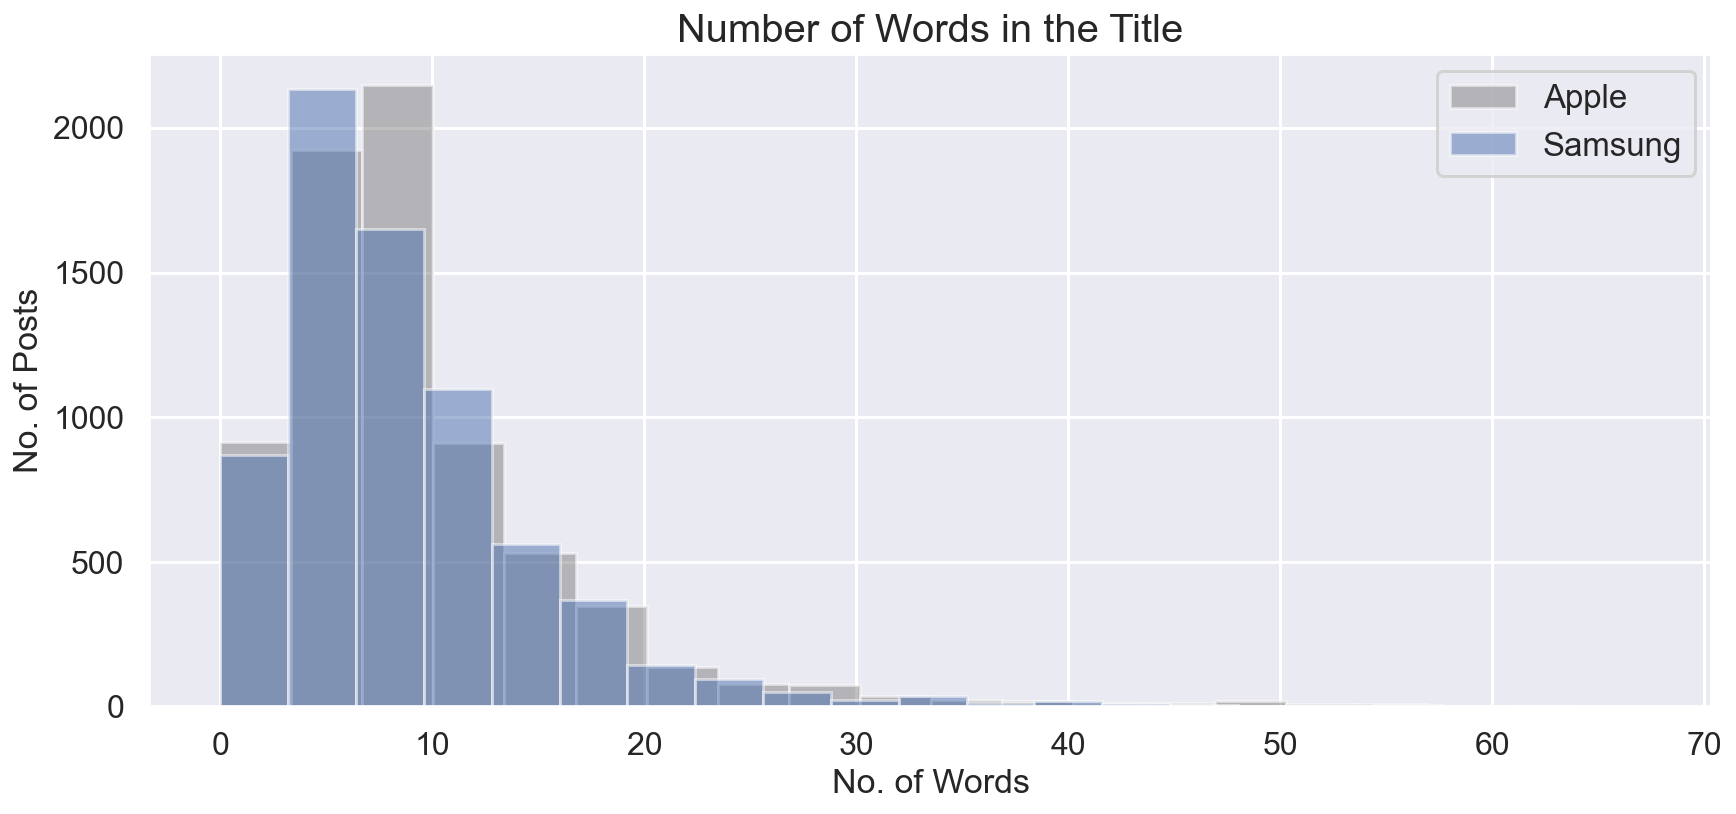

In [13]:
# Specifies the columns to use
ap_num = ap['title_num_words']
ss_num = ss['title_num_words']

# Plots the histograms with the specified parameters
kwargs = dict(alpha=0.5, bins=20)
plt.hist(ap_num, **kwargs, color='grey', label='Apple')
plt.hist(ss_num, **kwargs, color='b', label='Samsung')

# Sets figure size and various details regarding the title, labels and graph axes
plt.gcf().set_size_inches(14, 6)
plt.tick_params(labelsize=16)
plt.title('Number of Words in the Title', fontsize=20)
plt.xlabel('No. of Words', fontsize=17)
plt.ylabel('No. of Posts', fontsize=17)
plt.legend();

The distributions match what was seen in the summary statistics. There is some positive skewing.

## Number of words in the `selftext`

First, some summary statistics for Apple:

In [14]:
ap['selftext_num_words'].describe()

count    7208.000000
mean       92.556465
std       141.695926
min         0.000000
25%        33.000000
50%        60.000000
75%       105.000000
max      4980.000000
Name: selftext_num_words, dtype: float64

For Samsung:

In [15]:
ss['selftext_num_words'].describe()

count    7091.000000
mean       72.983359
std        81.947207
min         0.000000
25%        29.000000
50%        53.000000
75%        90.000000
max      1679.000000
Name: selftext_num_words, dtype: float64

We can see that the mean and median are lower for Samsung as compared to Apple. The median values between the two are more similar than the mean values. In Apple's case, the data is more positively skewed as shown by its maximum value.

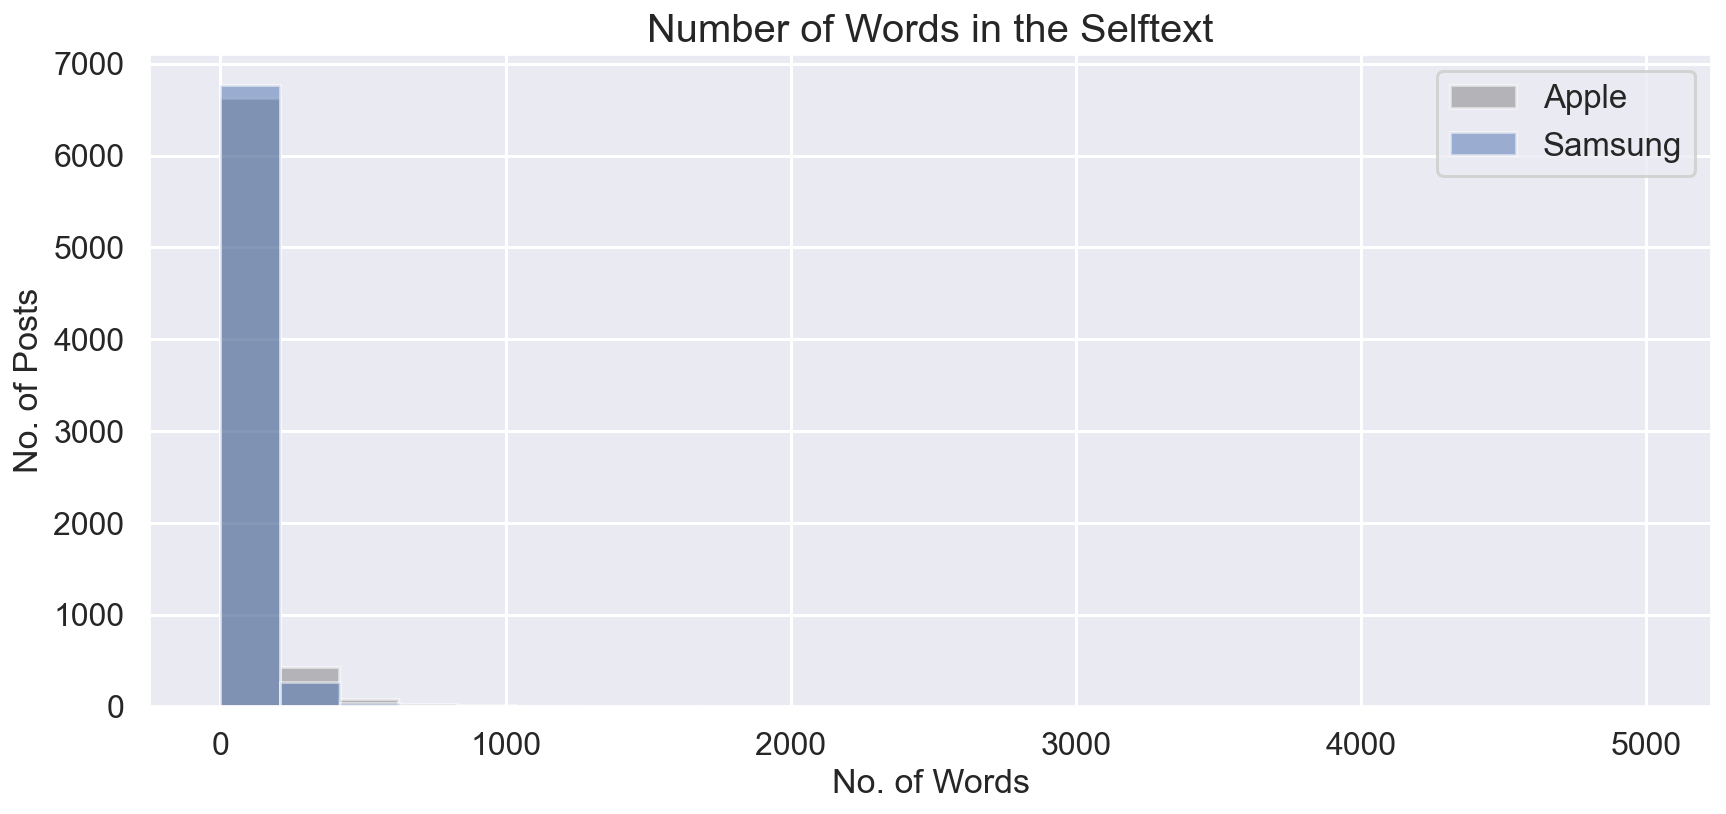

In [16]:
# Specifies the columns to use
ap_num = ap['selftext_num_words']
ss_num = ss['selftext_num_words']

# Plots the histogram with the specified parameters
ap_kwargs = dict(alpha=0.5, bins=24)
plt.hist(ap_num, **ap_kwargs, color='grey', label='Apple')

# Plots the histogram with the specified parameters
ss_kwargs = dict(alpha=0.5, bins=8)
plt.hist(ss_num, **ss_kwargs, color='b', label='Samsung')

# Sets figure size and various details regarding the title, labels and graph axes
plt.gcf().set_size_inches(14, 6)
plt.tick_params(labelsize=16)
plt.title('Number of Words in the Selftext', fontsize=20)
plt.xlabel('No. of Words', fontsize=17)
plt.ylabel('No. of Posts', fontsize=17)
plt.legend();

The distribution is extremely positively skewed. We will have to restrict the range used in the histogram to exclude outiers.

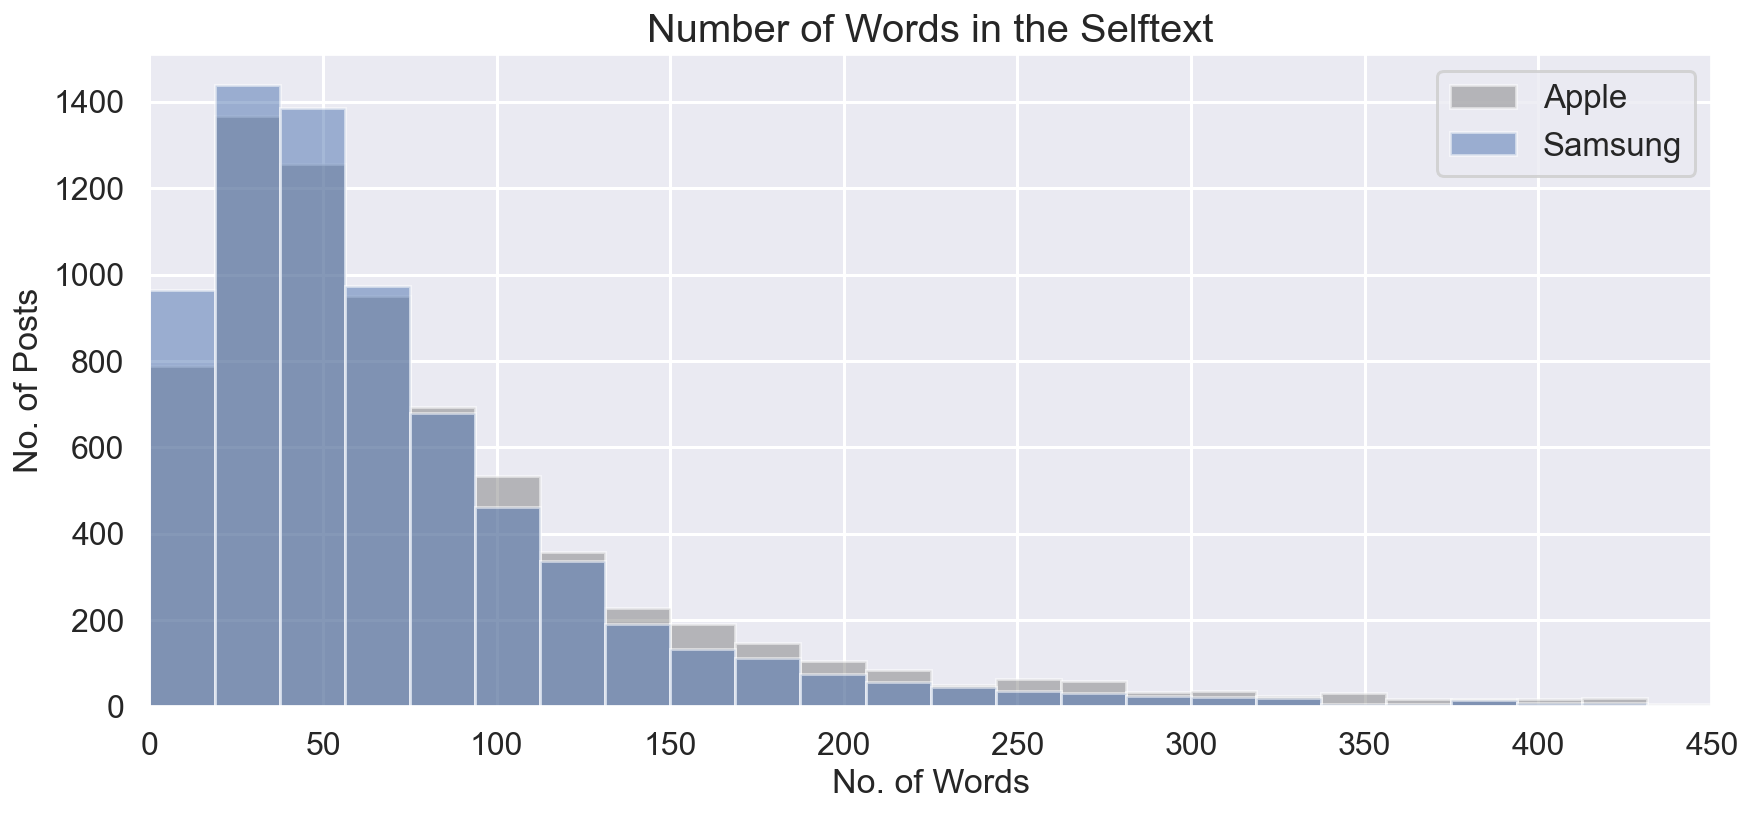

In [17]:
# Specifies the columns to use
ap_num = ap['selftext_num_words']
ss_num = ss['selftext_num_words']

# Plots the histograms with the specified parameters
kwargs = dict(alpha=0.5, bins=24)
plt.hist(ap_num, **kwargs, color='grey', label='Apple', range=(0,450))
plt.hist(ss_num, **kwargs, color='b', label='Samsung', range=(0,450))

# Sets figure size and various details regarding the title, labels and graph axes
plt.gcf().set_size_inches(14, 6)
plt.tick_params(labelsize=16)
plt.title('Number of Words in the Selftext', fontsize=20)
plt.xlabel('No. of Words', fontsize=17)
plt.ylabel('No. of Posts', fontsize=17)
plt.legend()

# Restrics the range of the plot
plt.xlim(0,450);

After outliers are excluded from the plot, we can see that the `selftext` in posts from Samsung tends to have a lower number of words.

## Number of words in the `text`

This is the combined text of `title` and `selftext`. First, some summary statistics for Apple:

In [18]:
ap['text_num_words'].describe()

count    7208.000000
mean      101.961709
std       142.868046
min         2.000000
25%        41.000000
50%        69.000000
75%       115.000000
max      4988.000000
Name: text_num_words, dtype: float64

For Samsung:

In [19]:
ss['text_num_words'].describe()

count    7091.000000
mean       81.891976
std        82.196561
min         2.000000
25%        38.000000
50%        61.000000
75%        98.000000
max      1692.000000
Name: text_num_words, dtype: float64

We can see here that the general observations are similar to the ones for `selftext`.

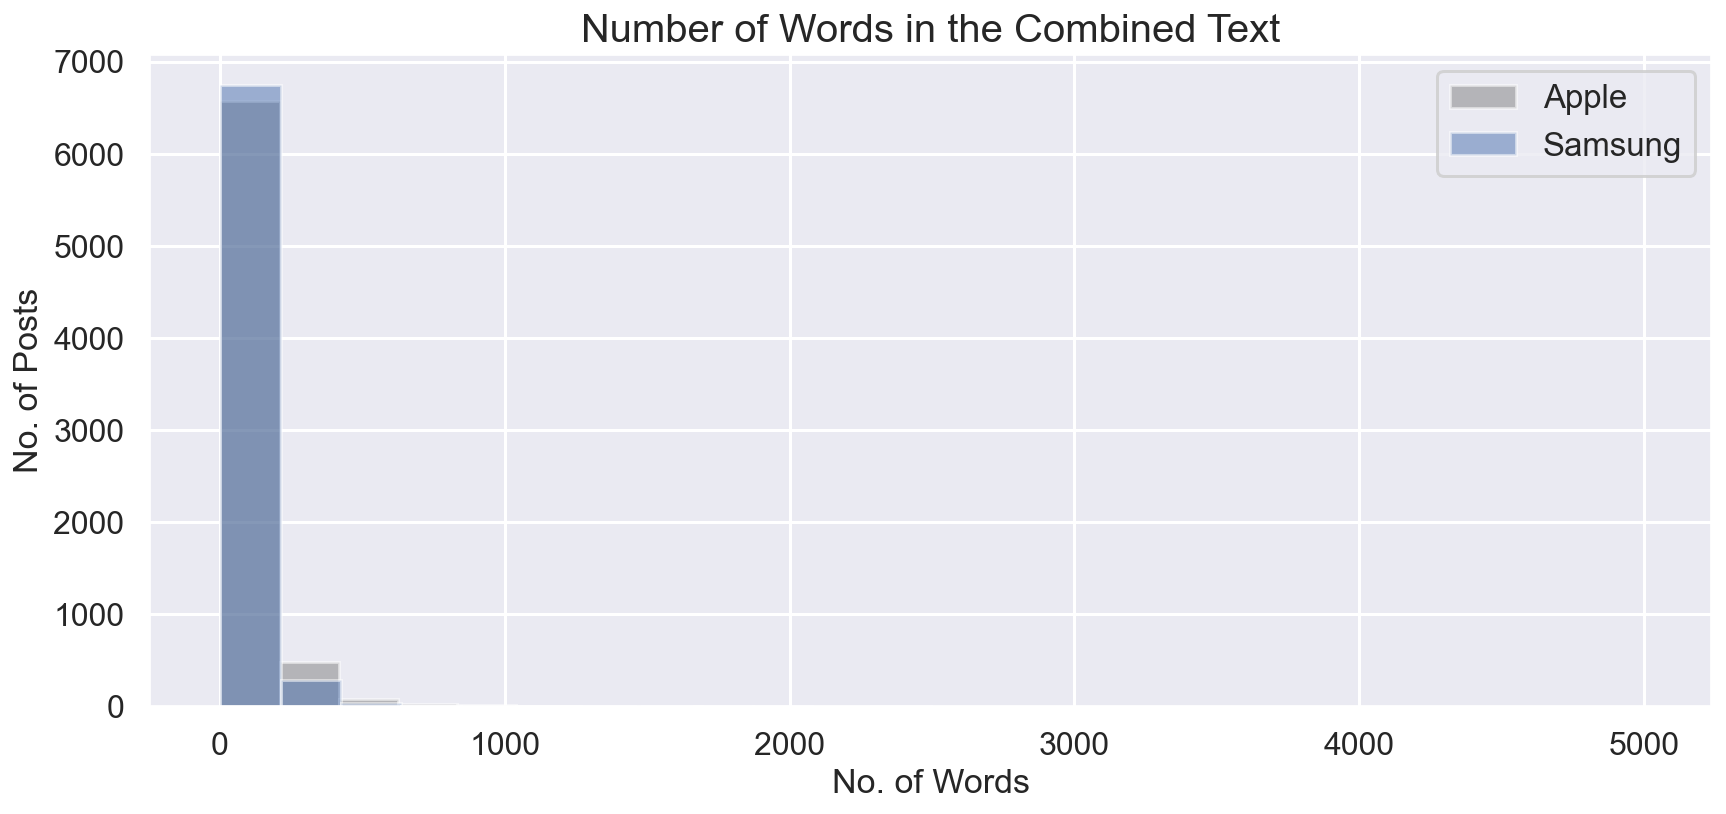

In [20]:
# Specifies the columns to use
ap_num = ap['text_num_words']
ss_num = ss['text_num_words']

# Plots the histogram with the specified parameters
ap_kwargs = dict(alpha=0.5, bins=24)
plt.hist(ap_num, **ap_kwargs, color='grey', label='Apple')

# Plots the histogram with the specified parameters
ss_kwargs = dict(alpha=0.5, bins=8)
plt.hist(ss_num, **ss_kwargs, color='b', label='Samsung')

# Sets figure size and various details regarding the title, labels and graph axes
plt.gcf().set_size_inches(14, 6)
plt.tick_params(labelsize=16)
plt.title('Number of Words in the Combined Text', fontsize=20)
plt.xlabel('No. of Words', fontsize=17)
plt.ylabel('No. of Posts', fontsize=17)
plt.legend();

The distribution is extremely positively skewed. We will have to restrict the range used in the histogram to exclude outiers.

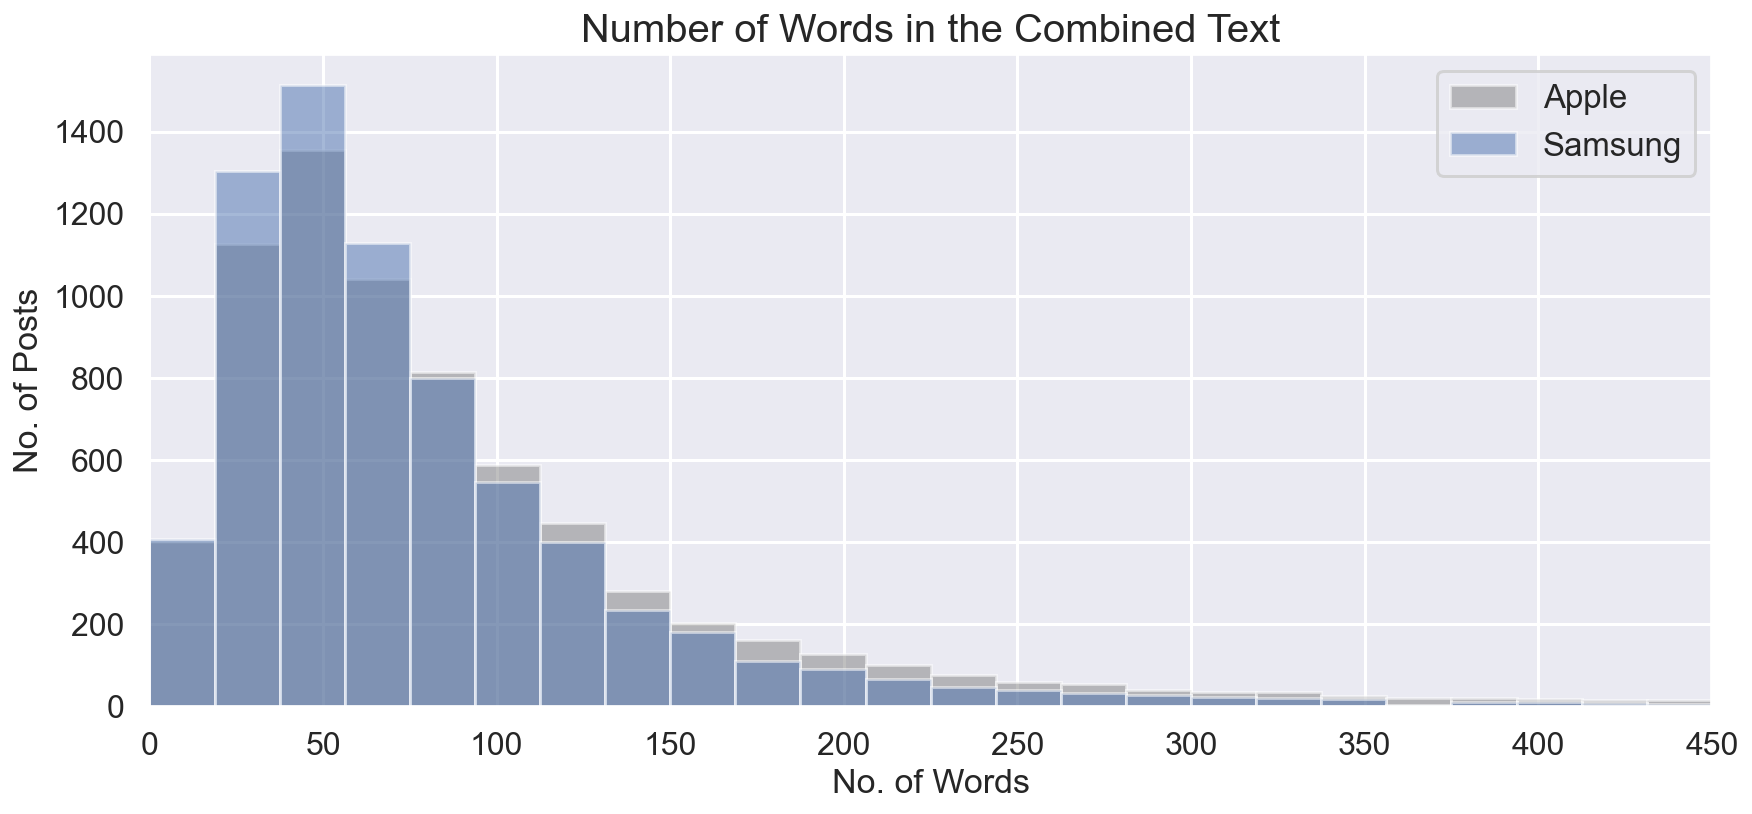

In [21]:
# Specifies the columns to use
ap_num = ap['text_num_words']
ss_num = ss['text_num_words']

# Plots the histograms with the specified parameters
kwargs = dict(alpha=0.5, bins=24)
plt.hist(ap_num, **kwargs, color='grey', label='Apple', range=(0,450))
plt.hist(ss_num, **kwargs, color='b', label='Samsung', range=(0,450))

# Sets figure size and various details regarding the title, labels and graph axes
plt.gcf().set_size_inches(14, 6)
plt.tick_params(labelsize=16)
plt.title('Number of Words in the Combined Text', fontsize=20)
plt.xlabel('No. of Words', fontsize=17)
plt.ylabel('No. of Posts', fontsize=17)
plt.legend()

# Restrics the range of the plot
plt.xlim(0,450);

We can see here that the general observations are similar to the ones for `selftext`.

# Additional Data Filtering

We will be using only the `text` column for the modelling. However, there are severe outliers.  Hence, we will use the 1.5 IQR method of outlier detection. 

The IQR is the interquartile range, which is the 75th percentile value minus the 25th percentile value. This is then multiplied by 1.5. The number is then subtracted from the 25th percentile to get the lower bound, or added to the 75th percentile to get the upper bound. 

This is actually the formula to calculate where the whiskers of a box plot extend to. It includes only data within 2.7 standard deviations from the mean. For reference, the 68–95–99.7 states that 2 standard deviations from the mean will cover 95% of the data, and 3 standard deviations will cover 99.7%. Hence, this is a reasonable way to exclude outliers. 

Summary statistics for the number of words in the `text` for Apple:

In [22]:
ap['text_num_words'].describe()

count    7208.000000
mean      101.961709
std       142.868046
min         2.000000
25%        41.000000
50%        69.000000
75%       115.000000
max      4988.000000
Name: text_num_words, dtype: float64

With reference to the summary statistics for Apple, the lower bound is as follows:

In [23]:
41-1.5*(115-41)

-70.0

With reference to the summary statistics for Apple, the upper bound is as follows:

In [24]:
115+1.5*(115-41)

226.0

Summary statistics for the number of words in the `text` for Samsung:

In [25]:
ss['text_num_words'].describe()

count    7091.000000
mean       81.891976
std        82.196561
min         2.000000
25%        38.000000
50%        61.000000
75%        98.000000
max      1692.000000
Name: text_num_words, dtype: float64

With reference to the summary statistics for Samsung, the lower bound is as follows:

In [26]:
38-1.5*(98-38)

-52.0

With reference to the summary statistics for Samsung, the upper bound is as follows:

In [27]:
38+1.5*(98-38)

128.0

Based on the average length of a sentence, mentioned in the Background and Research, we will filter out posts where the number of words in the title and selftext combined is 20 and below. 

The upper bounds from the calculations above will be used.

In [28]:
ap = ap[(20 < ap['text_num_words']) &  (ap['text_num_words'] < 226)]
ss = ss[(20 < ss['text_num_words']) & (ss['text_num_words'] < 128)]

The DataFrames now have the following number of rows:

In [29]:
len(ap)

6190

In [30]:
len(ss)

5511

We will set the number of rows for both datasets to be the same:

In [31]:
ap = ap[['text', 'subreddit']][:4000]
len(ap)

4000

In [32]:
ss = ss[['text', 'subreddit']][:4000]
len(ss)

4000

The DataFrames will be combined.

In [33]:
ap_ss = pd.concat([ap, ss], ignore_index=True)
ap_ss.shape

(8000, 2)

The DataFrames now look like this:

In [34]:
ap_ss.head()

,text,subreddit
0,"Correct way to use battery pack? What is the correct way to use the battery pack, would it be pl...",apple
1,Will Siri ever be able to recognize the proper pronunciation of hard-to-pronounce names? As the ...,apple
2,Question: is it better to ship airpods to apple or take them to the apple store? I bought some a...,apple
3,Should I get the 2021 12.9” iPad Pro or wait till next year? I’m a student and I want to get an ...,apple
4,iMessage So I block someone on my iphone but suddenly I get a text from them on iMessage on my D...,apple


In [35]:
ap_ss.tail()

,text,subreddit
7995,Galaxy Tabs / Books Do these devices allow you to install Google Chrome desktop version? Or is i...,samsung
7996,Issues sending &amp; receiving pictures with overseas numbers I have an S20 and my friend has an...,samsung
7997,"Samsung notes no longer unlockable with fingerprint? Hello Everyone, As the title says, now th...",samsung
7998,When is the note 10 lite getting a ONE UI 3.1 update??? I know its been updated early March but ...,samsung
7999,Is it Crazy to switch from Note20U to the S21? So I bought my N20U when it released and though i...,samsung


We will save this to a .csv file for the modelling.

# Data Dictionary

The data dictionary is as follows:


|Feature|Type|Dataset|Description|
|---|---|---|---|
|**text**|object|ap_ss|Combined text of the title and post body.|
|**subreddit**|object|ap_ss|Subreddit that the post belongs to.|

# Natural Language Processing (Apple)

## Text cleaning

The data contains punctuation symbols, emojis, non-English characters, and junk words that consist of both numbers and letters. After removal, there could be empty strings, so these will be removed to clean up the data.

We will perform tokenisation for the text in each post to split them up into a list of words. For these words, lemmatisation will be done to convert the inflected forms of words into their base form and thus simplify the list of words. The words will also all be converted to lowercase as there is a distinction when words are in different cases. Stopwords will also be removed. These stopwords are words that frequently occur in all text, and thus they are removed to reduce unnecessary noise in the model.

The function below does this conversion.

In [36]:
stopwords = nltk.corpus.stopwords.words('english')

ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()

def clean_text(text):
    
    # Removes words that are all numeric characters, or words mixed with numbers
    text = re.sub(r'\w*\d\w*', '', text)
    
    # Tokenisation and punctuation removal. \W matches any non-word character (equivalent to [^a-zA-Z0-9_]).
    # Since \W does not match underscores, we specify '\W+|_' (\W or underscore).
    # Splits the text at any of these non-word characters (or groups of them). 
    # The '+' is to handle cases where there are 2 or more non-word characters between certain words
    tokens = re.split('\W+|_', text)
 
    # Removes all words that contain non-ASCII printable characters
    ascii_chars = set(string.printable)
    tokens =  [word for word in tokens if all(char in ascii_chars for char in word)]
    
    # Removes all empty strings, e.g. ''
    tokens = [word for word in tokens if word]
   
    # Apply lemmatisation, lowercasing and stopwords exclusion within the same step.
    tokens = [wn.lemmatize(word.lower()) for word in tokens if word.lower() not in stopwords] 
     
    return tokens

## CountVectorizer 

The `CountVectorizer` can convert the words into a matrix where each row is a post, and each column represents a word in the post. The value in each cell simply represents the number of occurences of that word in that post. The column names used represent all the unique words that we are tracking in the dataset.

We will create a function that plots the bar graphs of the top word counts, then plot the counts.

In [37]:
def word_chart(vectorizer, column, title):    

    # X_counts stores the vectorized version of the data
    X_counts = vectorizer.fit_transform(column)

    # Creates a DataFrame of the word counts
    X_counts_df = pd.DataFrame(X_counts.toarray(), columns=vectorizer.get_feature_names())

    # Takes the top 25 words based on counts and stores them in a DataFrame
    X_counts_sum = X_counts_df.sum().sort_values(ascending=False).head(25)

    # Plots the top 25 words based on counts
    X_counts_sum.sort_values(ascending=True).plot(kind='barh', figsize=(8,10), legend=False)
    plt.title(title);

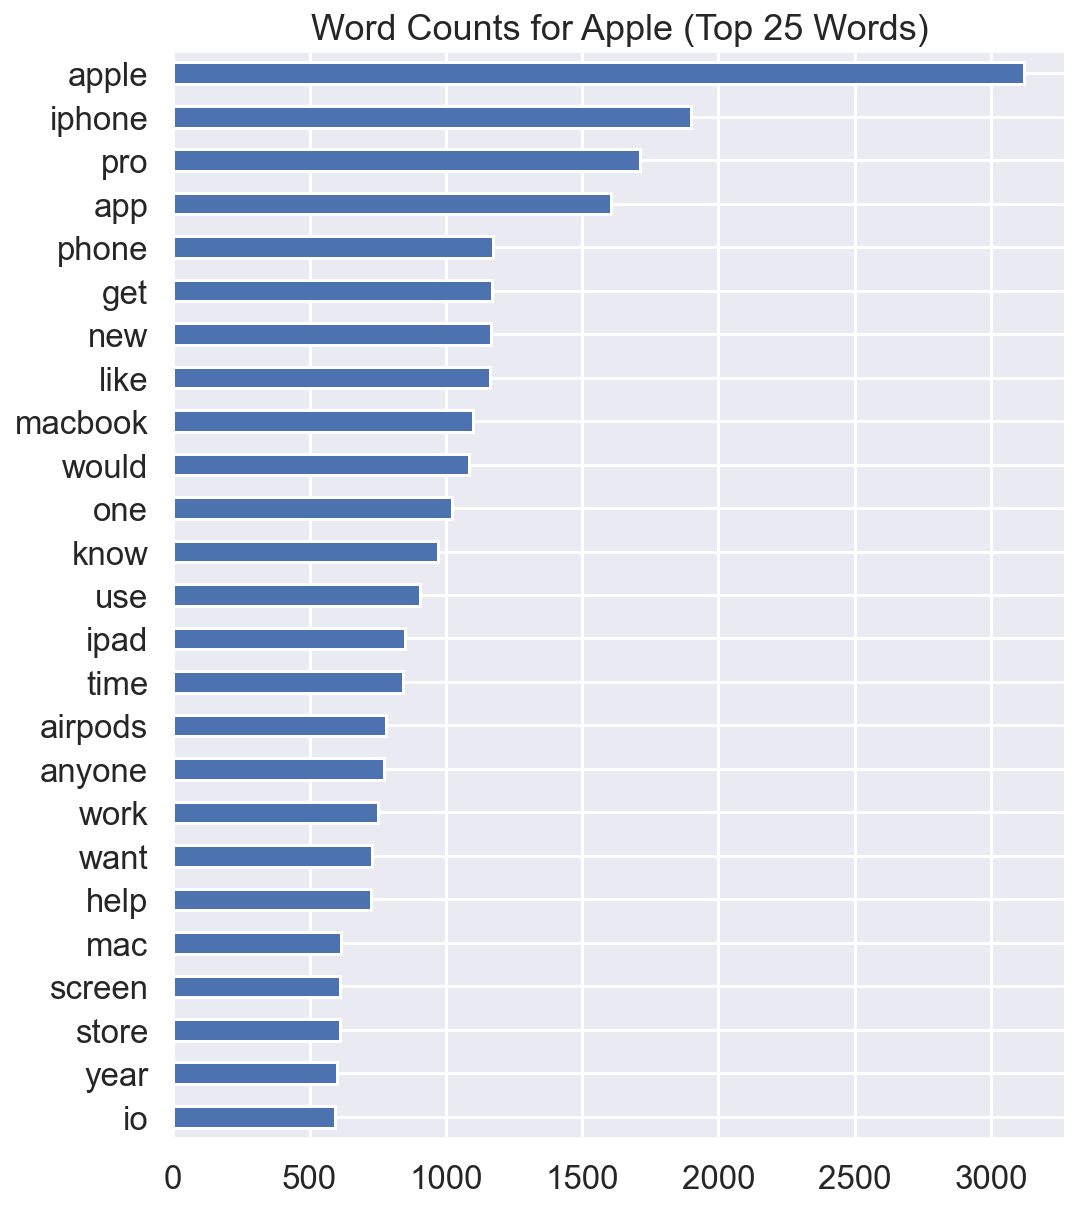

In [38]:
# Create an instance of CountVectorizer and pass in the clean_text function as the analyzer parameter
count_vect = CountVectorizer(analyzer=clean_text)

word_chart(count_vect, ap['text'], 'Word Counts for Apple (Top 25 Words)')

The top words are predictably, the brand name and the products. However, the words 'anyone' and 'help' implies that questions were possibly being asked.

## TfidfVectorizer 

The `TfidfVectorizer` can convert the words into a matrix where each row is a post, and each column represents a word in the post. However, instead of value in each cell simply representing the number of occurences of that word in that post, this number is actually multiplied by its inverse document frequency. This is the TFIDF, or term frequency–inverse document frequency. This weighting means that words that appear less in the data will have a higher TFIDF value, thus preventing common words from drowning out the significance of rarer ones which may also be predictive. The column names used represent all the unique words that we are tracking in the dataset. 

As with `CountVectorizer`, we will plot the word frequencies.

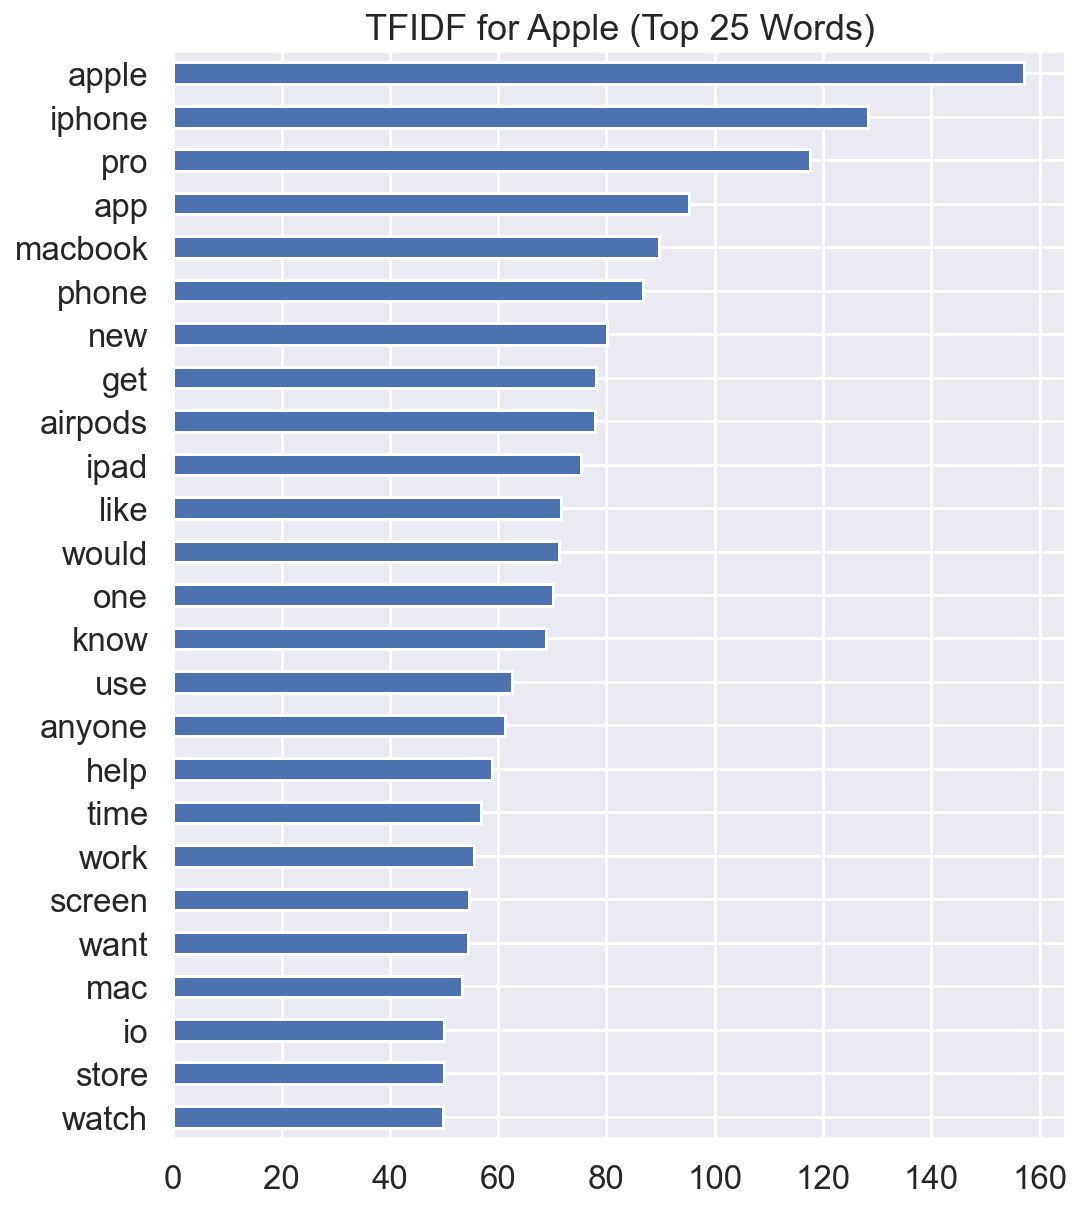

In [39]:
# Create an instance of TfidfVectorizer and pass in the clean_text function as the analyzer parameter
tfidf_vect = TfidfVectorizer(analyzer=clean_text)

word_chart(tfidf_vect, ap['text'], 'TFIDF for Apple (Top 25 Words)')

When the TFIDF vectorized data is used, the observations are about the same. 

## Text cleaning

The text cleaning function has to be changed slightly to plot bigrams and trigrams. A new column has to be made.

In [40]:
def clean_text_ngrams(text):
    
    # Removes words that are all numeric characters, or words mixed with numbers
    text = re.sub(r'\w*\d\w*', '', text)
    
    # Tokenisation and punctuation removal. \W matches any non-word character (equivalent to [^a-zA-Z0-9_]).
    # Since \W does not match underscores, we specify '\W+|_' (\W or underscore).
    # Splits the text at any of these non-word characters (or groups of them). 
    # The '+' is to handle cases where there are 2 or more non-word characters between certain words
    tokens = re.split('\W+|_', text)
 
    # Removes all words that contain non-ASCII printable characters
    ascii_chars = set(string.printable)
    tokens =  [word for word in tokens if all(char in ascii_chars for char in word)]
    
    # Removes all empty strings, e.g. ''
    tokens = [word for word in tokens if word]
   
    # Apply lemmatisation, lowercasing and stopwords exclusion within the same step.
    # For n-grams, it requires a full sentence to be passed in as opposed to a tokenized list
    text = " ".join([wn.lemmatize(word.lower()) for word in tokens if word.lower() not in stopwords]) 
     
    return text

In [41]:
# Creating a new column for the cleaned text
ap['cleaned_text'] = ap['text'].apply(lambda x: clean_text_ngrams(x))
ap.head(3)

,text,subreddit,cleaned_text
1,"Correct way to use battery pack? What is the correct way to use the battery pack, would it be pl...",apple,correct way use battery pack correct way use battery pack would plugging cable iphone battery pa...
2,Will Siri ever be able to recognize the proper pronunciation of hard-to-pronounce names? As the ...,apple,siri ever able recognize proper pronunciation hard pronounce name title say curious siri recogni...
3,Question: is it better to ship airpods to apple or take them to the apple store? I bought some a...,apple,question better ship airpods apple take apple store bought airpods pro year bought full cover in...


## CountVectorizer (bigrams)

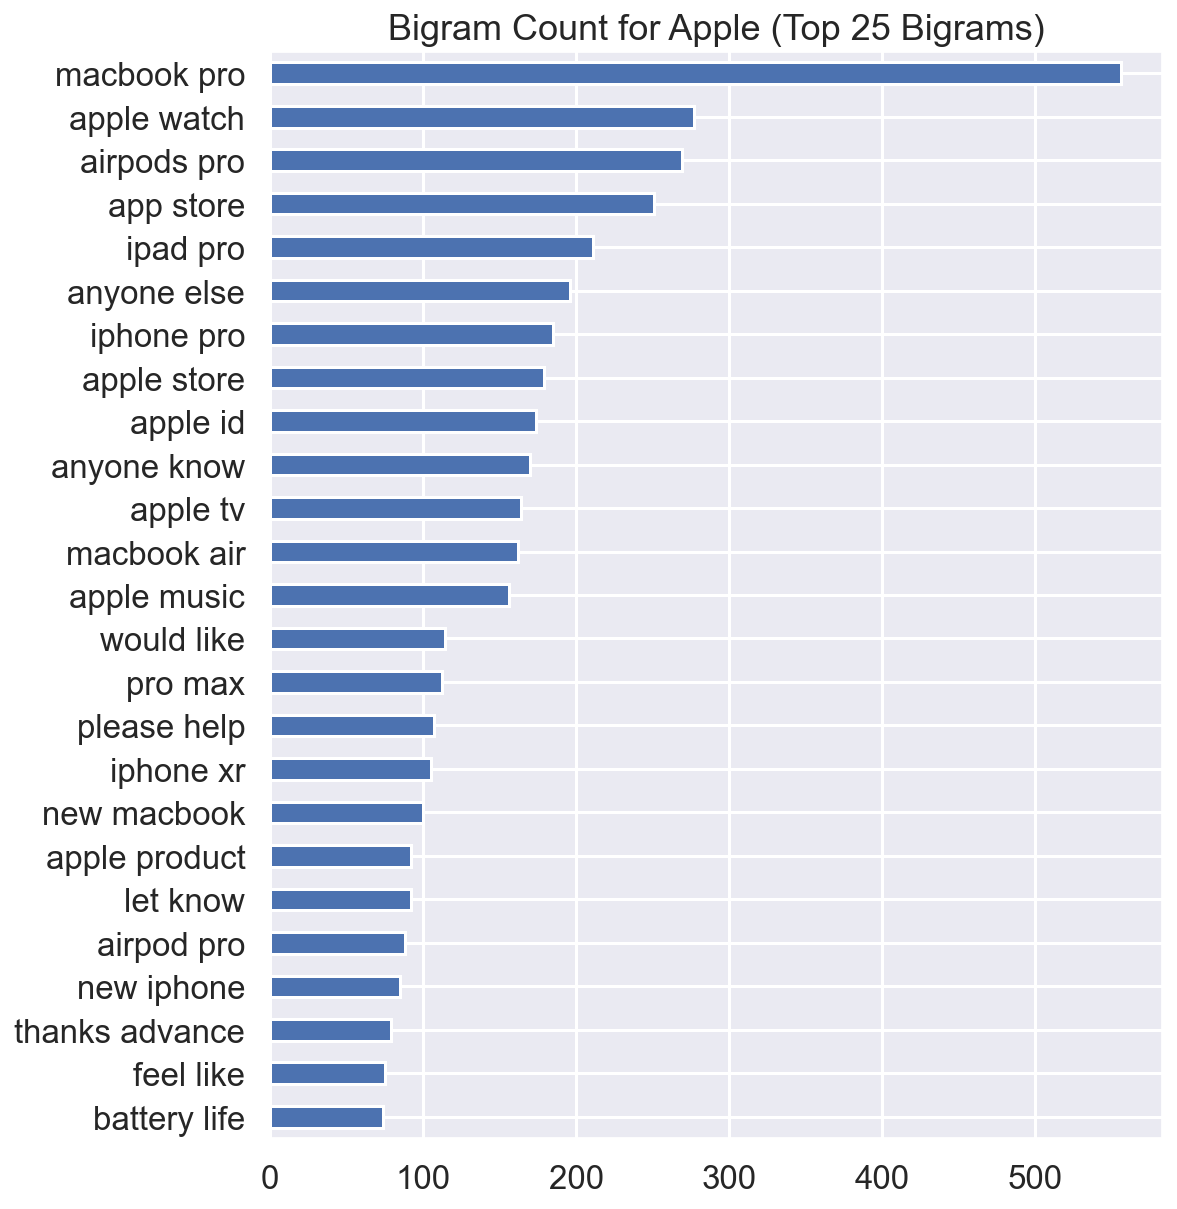

In [42]:
ngram_vect = CountVectorizer(ngram_range=(2,2))

word_chart(ngram_vect, ap['cleaned_text'], 'Bigram Count for Apple (Top 25 Bigrams)')

The bigrams reveal more information - we now see specific product names. The bigrams 'anyone else', 'anyone know', 'please help' and 'thanks advance' gives further support to the hypothesis that questions are a predominant component of the posts. The bigrams 'new macbook' and 'new iphone' indicate that potential purchasers are asking questions. They could also have been from new owners of the products. The bigram 'battery life' indicates that this is a concern for the people on the subreddit. 

## CountVectorizer (trigrams)

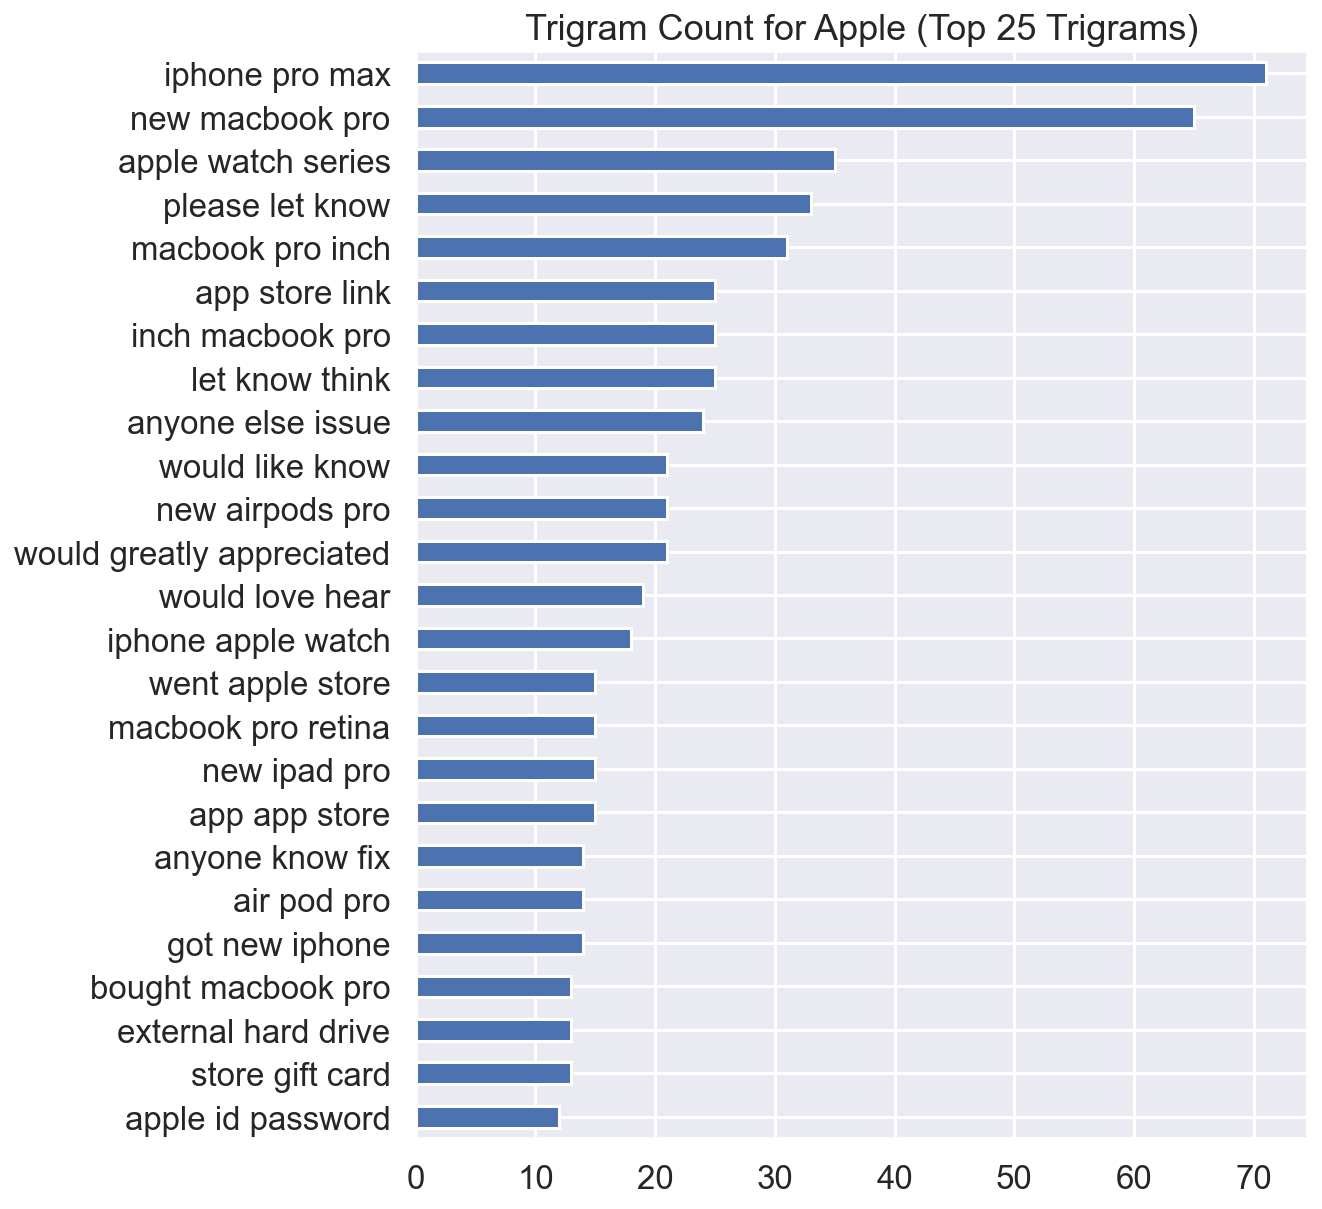

In [43]:
ngram_vect = CountVectorizer(ngram_range=(3,3))

word_chart(ngram_vect, ap['cleaned_text'], 'Trigram Count for Apple (Top 25 Trigrams)')

The observations for the trigrams are generally similar, except we now see that people could be asking for help regarding issues with their product. We see the trigrams 'anyone else issue' and 'anyone know fix', amidst the other trigrams that look like they could be related to questions.

# Natural Language Processing (Samsung)

## CountVectorizer 

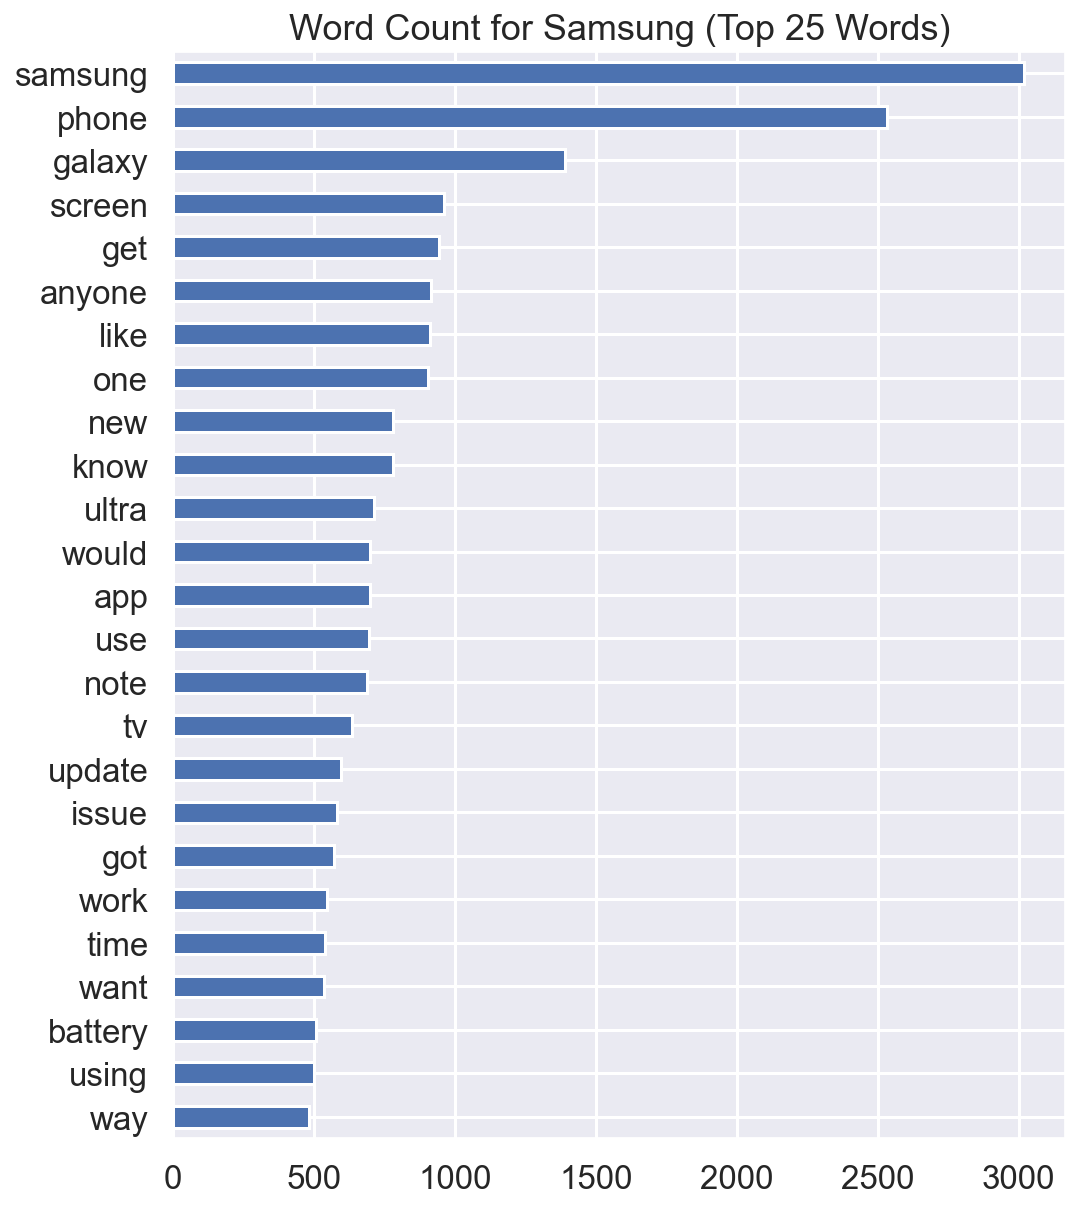

In [44]:
# Create an instance of CountVectorizer and pass in the clean_text function as the analyzer parameter
count_vect = CountVectorizer(analyzer=clean_text)

word_chart(count_vect, ss['text'], 'Word Count for Samsung (Top 25 Words)')

The observations here are similar to that of Apple's with regard to brand and product names appearing, and also with regards to question-asking. We see the word 'issue', which indicates troubleshooting. This word was not present in the Apple list. 

## TfidfVectorizer

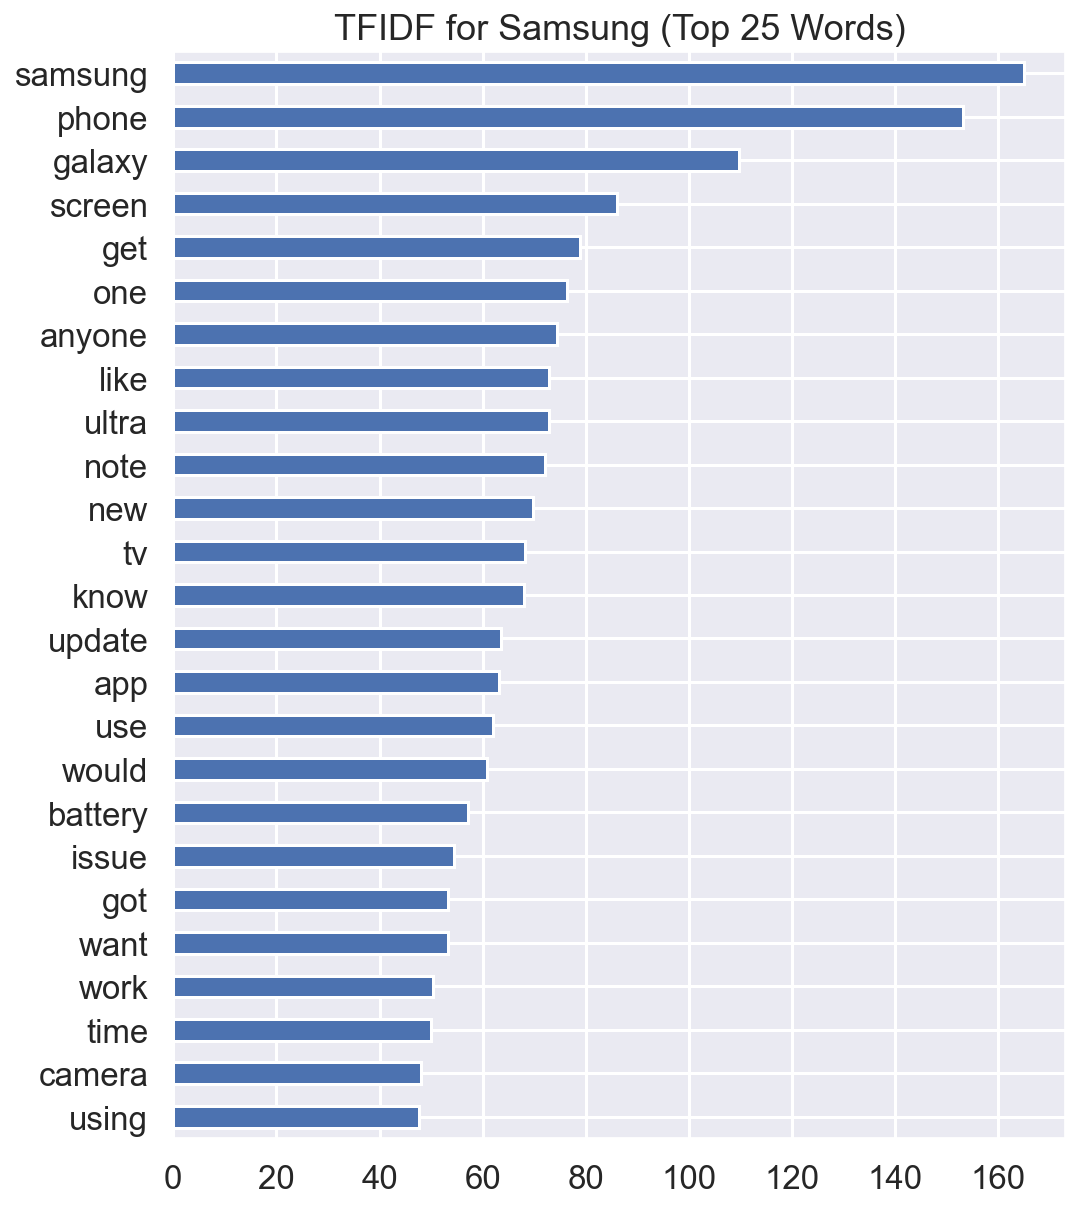

In [45]:
# Create an instance of TfidfVectorizer and pass in the clean_text function as the analyzer parameter
tfidf_vect = TfidfVectorizer(analyzer=clean_text)

word_chart(tfidf_vect, ss['text'], 'TFIDF for Samsung (Top 25 Words)')

The TFIDF version is quite similar to the count vectorized one. 

## Text cleaning

A new column has to be made to get the bigrams and trigrams. 

In [46]:
# Creating a new column for the cleaned text
ss['cleaned_text'] = ss['text'].apply(lambda x: clean_text_ngrams(x))
ss.head(3)

,text,subreddit,cleaned_text
0,"Did the Devil emojii change for Android? At least Samsung, because I swear it Does, but I can't ...",samsung,devil emojii change android least samsung swear quite put finger think mightve changed latest up...
2,DONT UPDATE YOUR A21 PHONE I work in a phone repair store I don't speak for the brand or any com...,samsung,dont update phone work phone repair store speak brand company speak seen recently non forced upd...
4,What phone should I upgrade to? I can probably upgrade to a better Samsung up to $1000 for free....,samsung,phone upgrade probably upgrade better samsung free get since dove new stuff currently note alway...


## CountVectorizer (bigrams)

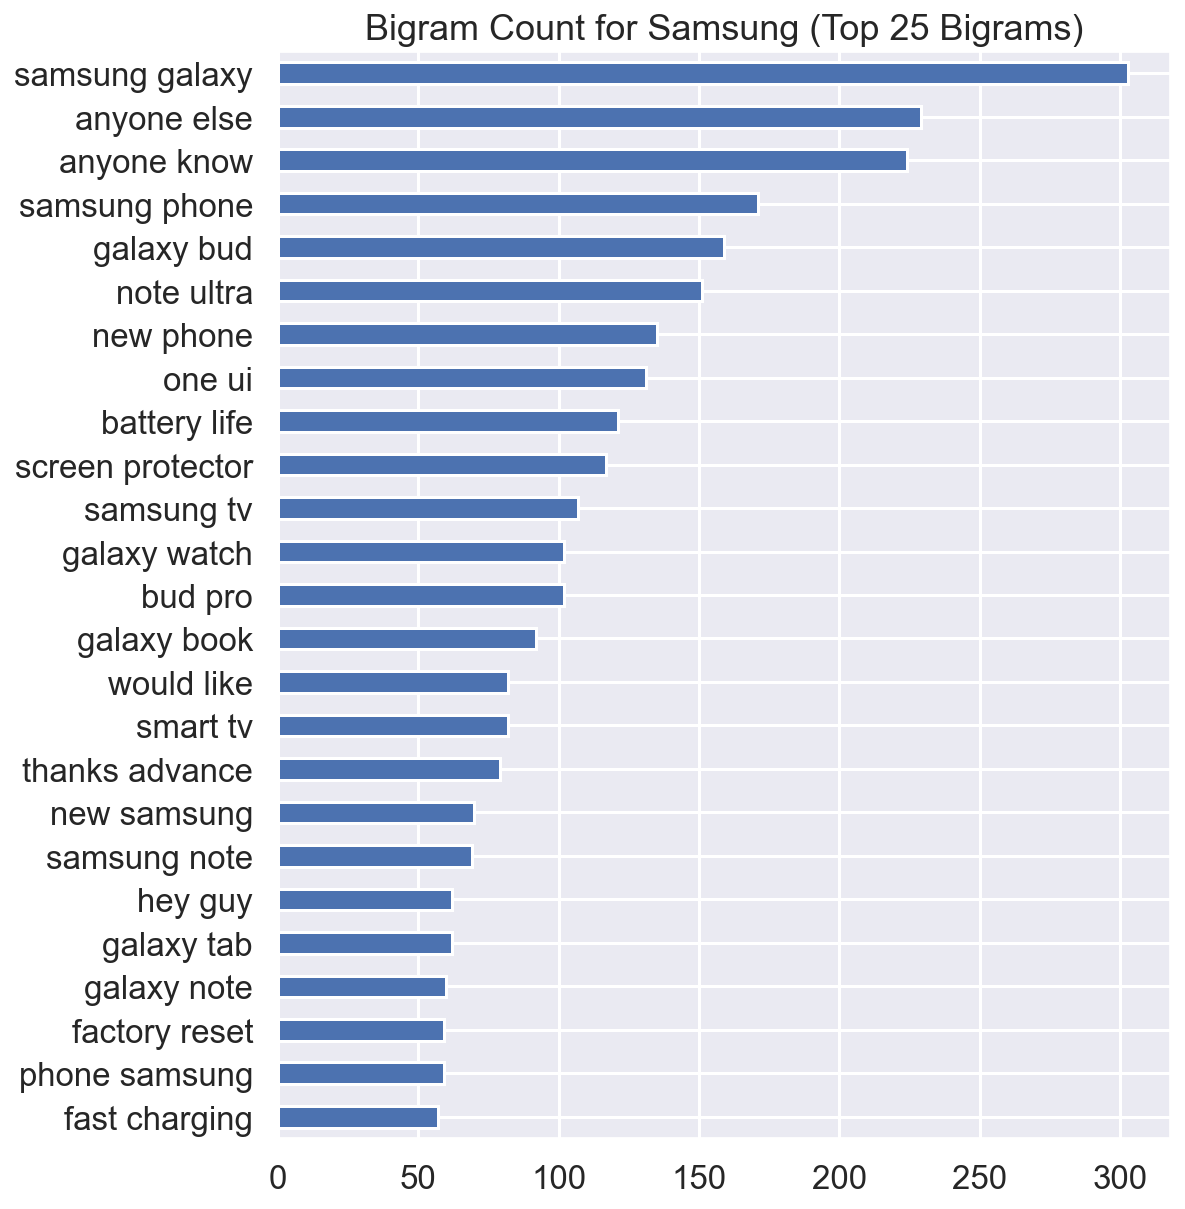

In [47]:
ngram_vect = CountVectorizer(ngram_range=(2,2))

word_chart(ngram_vect, ss['cleaned_text'], 'Bigram Count for Samsung (Top 25 Bigrams)')

Once again, we see that compiling the bigrams makes it more apparent that people are asking questions. 

## CountVectorizer (trigrams)

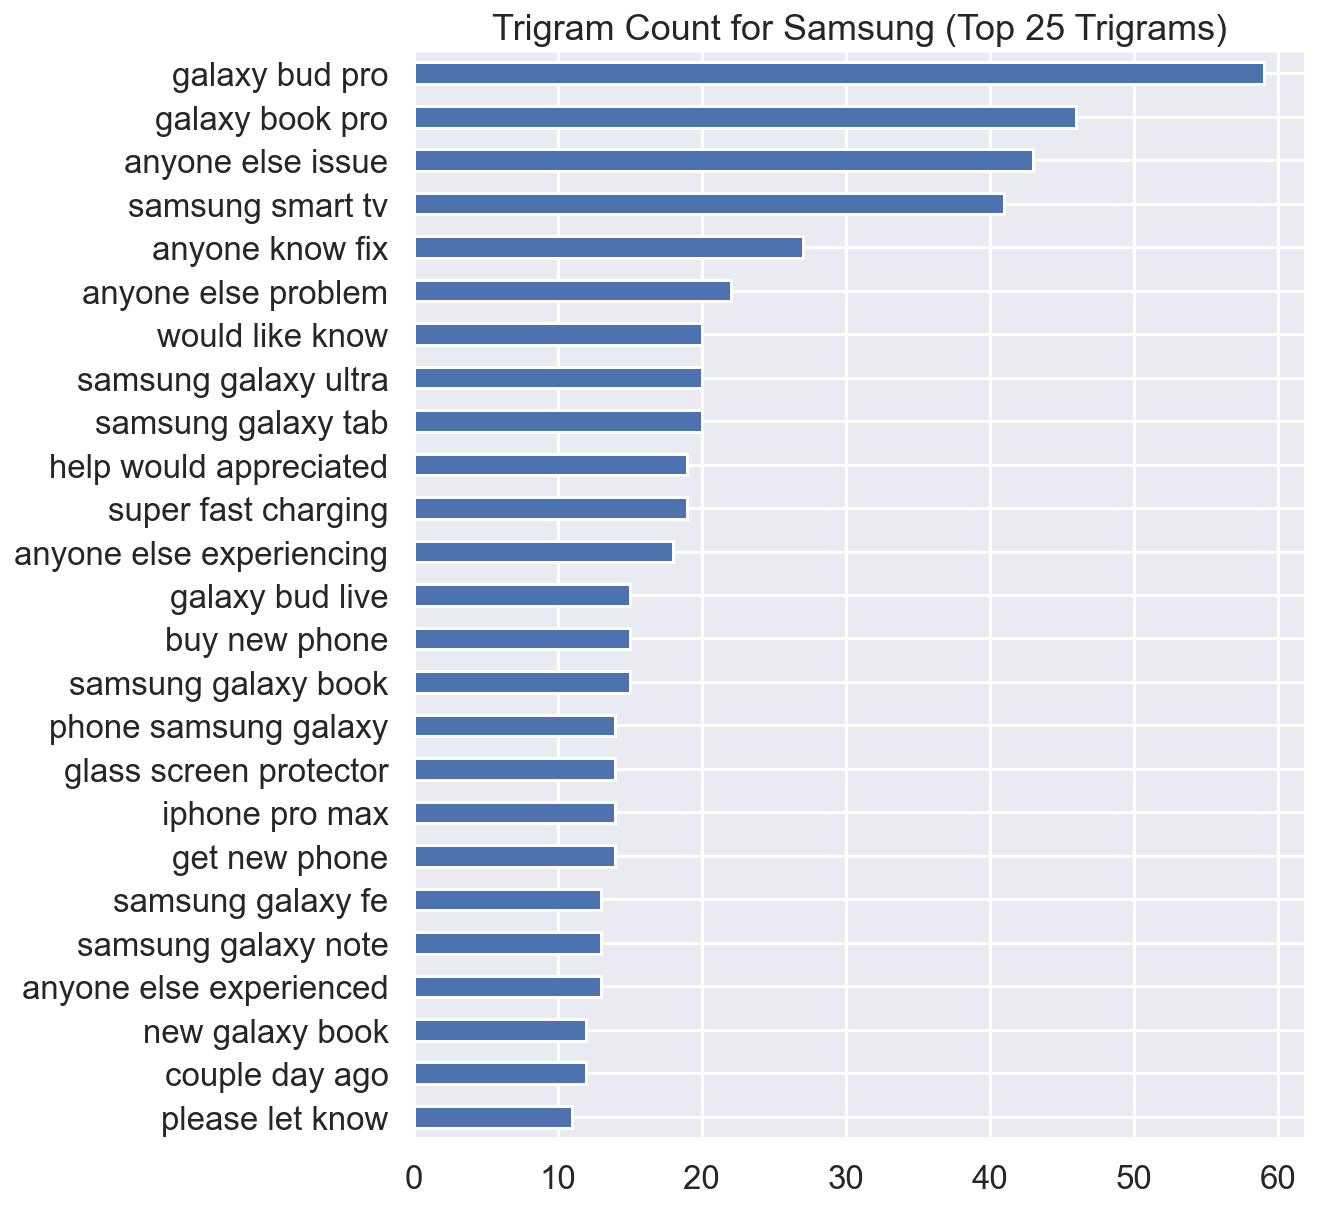

In [48]:
ngram_vect = CountVectorizer(ngram_range=(3,3))

word_chart(ngram_vect, ss['cleaned_text'], 'Trigram Count for Samsung (Top 25 Trigrams)')

There was the bigram 'fast charging' in the previous chart, and here, the trigram 'super fast charging' is revealed. Another thing that can be observed is that although 'anyone else issue' and 'anyone know fix' were seen in the trigrams for Apple as well, they occupy higher positions in this chart. Also, in this chart, we see the trigram 'anyone else problem' at a high position as well. This would indicate the emphasis on troubleshooting could be higher in the Samsung subreddit as opposed to the Apple subreddit. 

The modelling of the data will be done in the subsequent notebook.